In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from mice_dfi import plots

## Load data

In [2]:
df_luciferase = pd.read_csv('./generated/luciferase_data.csv')
df_diets = pd.read_csv('./generated/diets_data.csv')
df_diets_F = df_diets[df_diets.sex=='F'].copy()
df_diets_M = df_diets[df_diets.sex=='M'].copy()
df_rapamycin = pd.read_csv('./generated/rapamycin_data.csv')
df_rapamycin_bw = pd.read_csv('./generated/rapamycin_bw_data.csv')

## Fit data and plot

### Figs 6a and 6b

In [3]:
fileformat = 'svg'
os.makedirs('./figs',exist_ok=True)  # saving pngs
os.makedirs('./source',exist_ok=True)  # saving source data
bbox_inches = None # None  or 'tight'
production = True
plots.set_style(production=production)
cm = 1/2.54  # centimeters in inches
dpi=300
if production:
    fig_size = 18. / 4  * cm
    fontsize = 7
    scale=0.5
else:
    fig_size = 18. * cm
    fontsize = 14
    scale= 1

n=23 animals


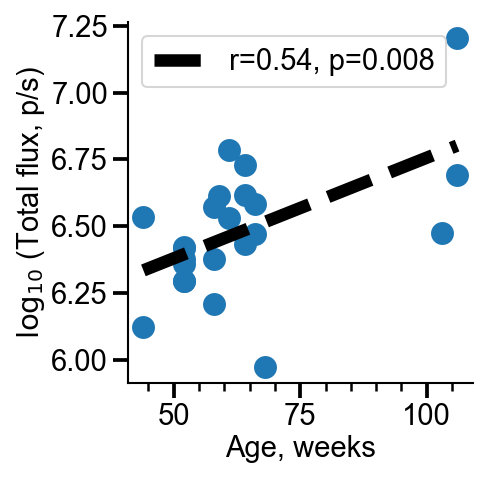

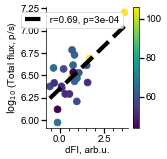

In [4]:
figsize=(fig_size, fig_size)
# figsize=(2,1.6925)
figname = 'fig6a_senescent_age'
fig = plt.figure(figsize=figsize, dpi=dpi)
plt.scatter(df_luciferase.age, df_luciferase.Tot_ave_bk_fr,  label=None )
lin_fit = plots.plot_linear_fit(df_luciferase.age, df_luciferase.Tot_ave_bk_fr, pdig=3)
print(f"n={len(df_luciferase)} animals")
plt.xlabel('Age, weeks')
plt.ylabel('$\log_{10}$ (Total flux, p/s)')
plt.legend(frameon=True)

# Save figure and source
fig.tight_layout()
fig.savefig('./figs/{:s}.{:s}'.format(figname, fileformat), bbox_inches=bbox_inches, dpi=300, pad_inches=0)
plt.show()

# Save data source for NC submission
source = df_luciferase[['age', 'Tot_ave_bk_fr']]
try:
    with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname), engine="openpyxl",  mode="a", if_sheet_exists="replace") as writer:
        source.to_excel(writer, sheet_name='data')
        pd.DataFrame(lin_fit.lines[0].get_xydata()).to_excel(writer, sheet_name='lin_fit')        
except FileNotFoundError:
    with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname), engine="openpyxl") as writer:
        source.to_excel(writer, sheet_name='data')
        pd.DataFrame(lin_fit.lines[0].get_xydata()).to_excel(writer, sheet_name='lin_fit')        



figname = 'fig6b_senescent_pfi'
fig = plt.figure(figsize=figsize)
plt.scatter(df_luciferase.dFI, df_luciferase.Tot_ave_bk_fr, c=df_luciferase.age , cmap='viridis', label=None )
lin_fit = plots.plot_linear_fit(df_luciferase.dFI, df_luciferase.Tot_ave_bk_fr, pdig=3)
# plt.colorbar(label='Age, weeks')
plt.colorbar()
plt.xlabel('dFI, arb.u.')
plt.ylabel('$\log_{10}$ (Total flux, p/s)')
plt.legend(frameon=True)


# Save figure and source
fig.tight_layout()
fig.savefig('./figs/{:s}.{:s}'.format(figname, fileformat), bbox_inches=bbox_inches, dpi=300, pad_inches=0)
plt.show()

# Save data source for NC submission
source = df_luciferase[['dFI', 'Tot_ave_bk_fr']]
try:
    with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname), engine="openpyxl",  mode="a", if_sheet_exists="replace") as writer:
        source.to_excel(writer, sheet_name='data')
        pd.DataFrame(lin_fit.lines[0].get_xydata()).to_excel(writer, sheet_name='lin_fit')        
except FileNotFoundError:
    with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname), engine="openpyxl") as writer:
        source.to_excel(writer, sheet_name='data')
        pd.DataFrame(lin_fit.lines[0].get_xydata()).to_excel(writer, sheet_name='lin_fit')  

### Figure 6c and 6d

group
HFD     8
RD     12
Name: uid, dtype: int64


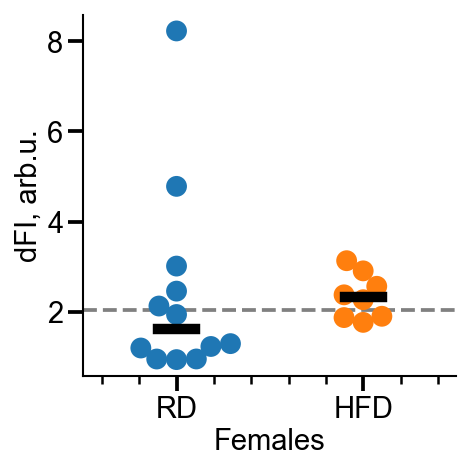

group
HFD    7
RD     8
Name: uid, dtype: int64


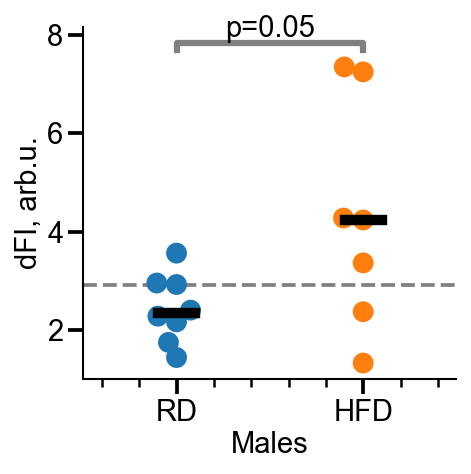

In [5]:
figsize=(fig_size, fig_size)
# figsize=(2,1.6925)
ttest_ind = lambda x, y: scipy.stats.ttest_ind(x,y, equal_var=True )[1]
figname = 'fig6cd_diets_{:s}'
for tag, df in zip(('females', 'males'), (df_diets_F, df_diets_M)):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    print(df[(df.age==78)&(df.mort_tte > 5)].groupby('group')['uid'].count())
    ax = plots.swarmplot(df[(df.age==78)&(df.mort_tte > 5)],  order=['RD', 'HFD'], y_key='dFI', ylabel='dFI, arb.u.',
                         xlabel=tag.capitalize(), pval_func=ttest_ind, sign_=0.05, fontsize=fontsize, markersize=10*scale)
    fig.tight_layout()
    fig.savefig('./figs/{:s}.{:s}'.format(figname.format(tag), fileformat), bbox_inches=bbox_inches, dpi=300)
    plt.show()
    
    # Save source
    source = pd.concat((pd.DataFrame(data=ax.collections[0].get_offsets(), columns=["RD_x", "RD_y"]),
           pd.DataFrame(data=ax.collections[1].get_offsets(), columns=["HFD_x", "HFD_y"]),
           pd.DataFrame(data=ax.get_lines()[0].get_xydata(), columns=["hline_x", "hline_y"]),
           pd.DataFrame(data=ax.get_lines()[1].get_xydata(), columns=["median_RD_x", "median_RD_y"]),
           pd.DataFrame(data=ax.get_lines()[2].get_xydata(), columns=["median_HFD_x", "median_HFD_y"]),           
          ), axis=1)
    try:
        with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname.format(tag)), engine="openpyxl",  mode="a", if_sheet_exists="replace") as writer:
            source.to_excel(writer)
    except FileNotFoundError:
        with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname.format(tag)), engine="openpyxl") as writer:
            source.to_excel(writer)

### Figure 6e, 6f and 6g

#### fig6e

Control      48
Rapamycin    12
Name: group, dtype: int64


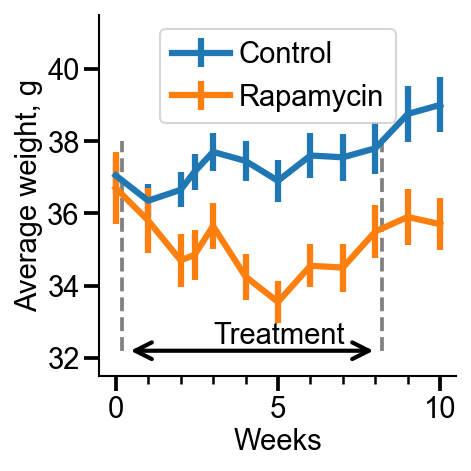

In [6]:
figsize=(fig_size, fig_size)
figname = 'fig6e_rapamycin_bw'

fig = plt.figure(figsize=figsize, dpi=dpi)
ax =plt.gca()
source = {}
print(df_rapamycin_bw[df_rapamycin_bw.age==5]['group'].value_counts())
for group, df in df_rapamycin_bw.groupby('group'):
    df_aggregated = df.groupby('age', as_index=False).median()
    df_aggregated_sem = df.groupby('age', as_index=False).sem()
    m = df_aggregated.age > 0 
    plt.errorbar(df_aggregated.age[m]-1,  df_aggregated.bw[m], yerr=df_aggregated_sem.bw[m], label=group, lw=3*scale)
    source['weeks_{:s}'.format(group)] = df_aggregated.age[m]-1
    source['weight_{:s}'.format(group)] = df_aggregated.bw[m]
    source['weight_sem_{:s}'.format(group)] = df_aggregated_sem.bw[m]

xpos_l, xpos_r, ypos = 0.2, 8.2,32.2
ax.annotate(text='', xy=(xpos_l,ypos), xytext=(xpos_r, ypos),  arrowprops=dict(arrowstyle='<->', color='k', lw=2*scale))
ax.annotate(text='Treatment', xy=(3,ypos+0.2), fontsize=fontsize )
ax.plot([xpos_l,xpos_l], [ypos,38],'--', color='grey')
ax.plot([xpos_r,xpos_r], [ypos,38],'--', color='grey')
ax.set_ylim(31.5, 41.5)
ax.set_xlabel('Weeks')
ax.set_ylabel('Average weight, g')
plt.legend(loc=9, frameon=True)

# Save PNG
fig.tight_layout()
fig.savefig('./figs/{:s}.{:s}'.format(figname, fileformat), bbox_inches=bbox_inches, dpi=300)
plt.show()

# Save source
source = pd.DataFrame(source)
try:
    with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname), engine="openpyxl",  mode="a", if_sheet_exists="replace") as writer:
        source.to_excel(writer)
except FileNotFoundError:
    with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname), engine="openpyxl") as writer:
        source.to_excel(writer)

#### fig6f

Control      48
Rapamycin    12
Name: group, dtype: int64


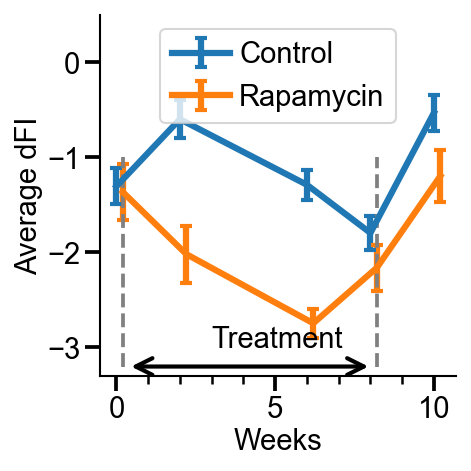

In [7]:
df_rapa = df_rapamycin.copy()
df_rapa['age'] = df_rapa['age']-67
print(df_rapa[df_rapa.age==0]['group'].value_counts())
df_rapa.loc[df_rapa.group=='Rapamycin', 'age'] += 0.2

figsize=(fig_size, fig_size)
figname = 'fig6f_rapamycin_dfi'

fig = plt.figure(figsize=figsize, dpi=dpi)
ax =plt.gca()
source = {}

for group, df in df_rapa.groupby('group'):
    df_aggregated = df.groupby('age', as_index=False).median()
    df_aggregated_sem = df.groupby('age', as_index=False).sem()
    plt.errorbar(df_aggregated.age,  df_aggregated.dFI, yerr=df_aggregated_sem.dFI, label=group, lw=3*scale, capsize=3*scale)
    source['weeks_{:s}'.format(group)] = df_aggregated.age
    source['dfi_{:s}'.format(group)] = df_aggregated.dFI
    source['dfi_sem_{:s}'.format(group)] = df_aggregated_sem.dFI

xpos_l, xpos_r, ypos = 0.2, 8.2, -3.2
ax.annotate(text='', xy=(xpos_l,ypos), xytext=(xpos_r, ypos),  arrowprops=dict(arrowstyle='<->', color='k', lw=2*scale))
ax.annotate(text='Treatment', xy=(3,ypos+0.2), fontsize=fontsize )
ax.plot([xpos_l,xpos_l], [ypos,-1],'--', color='grey')
ax.plot([xpos_r,xpos_r], [ypos,-1],'--', color='grey')
ax.set_ylim(ypos-0.1,0.5)
ax.set_xlabel('Weeks')
ax.set_ylabel('Average dFI')
plt.legend(frameon=True, loc=9)

# Save PNG
fig.tight_layout()
fig.savefig('./figs/{:s}.{:s}'.format(figname, fileformat), bbox_inches=bbox_inches, dpi=300)
plt.show()

# Save source
source = pd.DataFrame(source)
try:
    with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname), engine="openpyxl",  mode="a", if_sheet_exists="replace") as writer:
        source.to_excel(writer)
except FileNotFoundError:
    with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname), engine="openpyxl") as writer:
        source.to_excel(writer)

#### fig6g

Number of animal in the group: Drug
 No\ntreatment      204
Under\ntreatment     36
Name: dFI_delta, dtype: int64


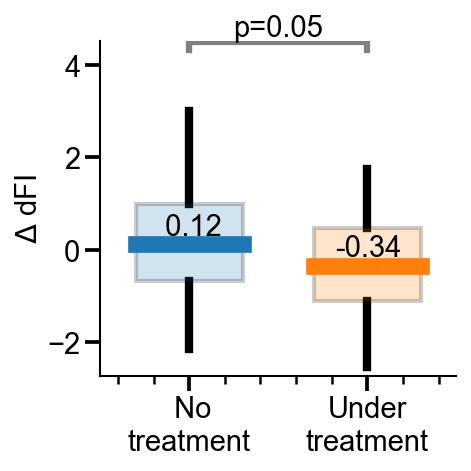

In [8]:
figname = 'fig6g_rapamycin_dfi_delta'
figsize=(fig_size, fig_size)
# figsize=(2,1.6925)
df_rapa = df_rapamycin.copy()
df_rapa['age'] = df_rapa['age']-67
ttest_ind = lambda x, y: scipy.stats.ttest_ind(x,y, equal_var=True )[1]

df_rapa['Drug'] = ' No\ntreatment'
df_rapa.loc[df_rapa.treatment==1, 'Drug'] = 'Under\ntreatment'
df_rapa = plots.calc_delta(df_rapa, 'dFI', shift=1)  # Calculate dFI delta
df_rapa = df_rapa[df_rapa.age.between(0, 80)]  # Take values during treatment
df_rapa = df_rapa.dropna(subset=['dFI_delta'])
print("Number of animal in the group:", df_rapa.groupby('Drug')['dFI_delta'].count())

fig = plt.figure(figsize=figsize, dpi=dpi)
ax =plt.gca()
ax, box_data, labels = plots.boxplot(df_rapa.dFI_delta,
                      df_rapa.Drug, fontsize=fontsize, medianprops={'linewidth': 8*scale},
                       color=plt.cm.tab10.colors[:2], flatten=True, ax=ax, showpvals=True, alpha=0.05, pval_func=ttest_ind)
ax.set_ylabel('$\Delta$ dFI')

# Save PNG
fig.tight_layout()
fig.savefig('./figs/{:s}.{:s}'.format(figname, fileformat), bbox_inches=bbox_inches, dpi=200)
plt.show()

# Save source
source = pd.DataFrame(box_data, index=np.char.asarray(labels).replace('\n', ' '), columns=['PCTL_5', 'PCTL_25', 'PCTL_50', 'PCTL_75', 'PCTL_95'])
try:
    with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname), engine="openpyxl",  mode="a", if_sheet_exists="replace") as writer:
        source.to_excel(writer)
except FileNotFoundError:
    with pd.ExcelWriter('./source/{:s}.xlsx'.format(figname), engine="openpyxl") as writer:
        source.to_excel(writer)
